# <center>Bike Sharing Demand</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Import-des-Librairies" data-toc-modified-id="Import-des-Librairies-2">Import des Librairies</a></span></li><li><span><a href="#Import-du-Dataset" data-toc-modified-id="Import-du-Dataset-3">Import du Dataset</a></span></li><li><span><a href="#Extraction-d'Informations-Temporelles-de-datetime" data-toc-modified-id="Extraction-d'Informations-Temporelles-de-datetime-4">Extraction d'Informations Temporelles de <code>datetime</code></a></span></li><li><span><a href="#Conversion-des-Types-des-Colonnes" data-toc-modified-id="Conversion-des-Types-des-Colonnes-5">Conversion des Types des Colonnes</a></span></li><li><span><a href="#Exploration-du-Dataset" data-toc-modified-id="Exploration-du-Dataset-6">Exploration du Dataset</a></span><ul class="toc-item"><li><span><a href="#Évolution-temporelle-du-nombre-de-locations" data-toc-modified-id="Évolution-temporelle-du-nombre-de-locations-6.1">Évolution temporelle du nombre de locations</a></span></li><li><span><a href="#Influence-de-la-saison-sur-le-nombre-total-de-locations" data-toc-modified-id="Influence-de-la-saison-sur-le-nombre-total-de-locations-6.2">Influence de la saison sur le nombre total de locations</a></span></li><li><span><a href="#Influence-du-jour-de-la-semaine-sur-le-nombre-total-de-locations" data-toc-modified-id="Influence-du-jour-de-la-semaine-sur-le-nombre-total-de-locations-6.3">Influence du jour de la semaine sur le nombre total de locations</a></span></li><li><span><a href="#Influence-des-vacances-sur-le-nombre-total-de-locations" data-toc-modified-id="Influence-des-vacances-sur-le-nombre-total-de-locations-6.4">Influence des vacances sur le nombre total de locations</a></span></li><li><span><a href="#Influence-de-la-météo-sur-le-nombre-total-de-locations" data-toc-modified-id="Influence-de-la-météo-sur-le-nombre-total-de-locations-6.5">Influence de la météo sur le nombre total de locations</a></span></li><li><span><a href="#Influence-de-la-température-sur-le-nombre-total-de-locations" data-toc-modified-id="Influence-de-la-température-sur-le-nombre-total-de-locations-6.6">Influence de la température sur le nombre total de locations</a></span></li><li><span><a href="#Influence-de-l'humidité-sur-le-nombre-total-de-locations" data-toc-modified-id="Influence-de-l'humidité-sur-le-nombre-total-de-locations-6.7">Influence de l'humidité sur le nombre total de locations</a></span></li><li><span><a href="#Influence-de-la-vitesse-du-vent-sur-le-nombre-total-de-locations" data-toc-modified-id="Influence-de-la-vitesse-du-vent-sur-le-nombre-total-de-locations-6.8">Influence de la vitesse du vent sur le nombre total de locations</a></span></li><li><span><a href="#Résumé-des-observations" data-toc-modified-id="Résumé-des-observations-6.9">Résumé des observations</a></span></li></ul></li><li><span><a href="#Préparation-du-jeu-de-données" data-toc-modified-id="Préparation-du-jeu-de-données-7">Préparation du jeu de données</a></span><ul class="toc-item"><li><span><a href="#Séparation-en-jeux-d'entraînement-et-de-test" data-toc-modified-id="Séparation-en-jeux-d'entraînement-et-de-test-7.1">Séparation en jeux d'entraînement et de test</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-7.2">Feature Engineering</a></span></li></ul></li></ul></div>

## Introduction

Le but de ce projet consiste à entraîner un modèle capable de prédire le nombre de vélos loués à n'importe quel temps t dans des bornes libres-services de la ville (système type Vélib'). La variable cible à prédire est ici la variable `count`.

Voici un descriptif de l'ensemble des variables du jeu de données:
* `datetime` - date et heure du relevé 
* `season` - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* `holiday` – indique si le jour est un jour de vacances scolaires 
* `workingday` - indique si le jour est travaillé (ni week-end ni vacances) 
* `weather` - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* `temp` – température en degrés Celsius 
* `atemp` – température ressentie en degrés Celsius 
* `humidity` – taux d’humidité 
* `windspeed` – vitesse du vent 
* `casual` - nombre de locations d’usagers non abonnés 
* `registered` – nombre de locations d’usagers abonnés 
* `count` – nombre total de locations de vélos 

## Import des Librairies

In [1]:
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
sns.set_style("whitegrid")

## Import du Dataset

In [2]:
dataset = pd.read_csv("data/velo.csv")
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Le jeu de données ne comporte pas de valeurs manquantes. 

Affichons les premières lignes pour nous faire une meilleure idée des données qu'il contient.

In [3]:
dataset.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Extraction d'Informations Temporelles de `datetime`

Avant de passer à l'exploration du dataset, nous extrayons l'année, le jour et l'heure des timestamps de la colonne `datetime`. Nous créons ainsi trois nouvelles colonnes `year`, `weekday` et `hour`.

Plutôt que d'extraire le jour en chiffres, nous extrayons le nom du jour de la semaine. Cela nous permet d'avoir une colonne avec moins de catégories. Il nous apparait également plus pertinent de pouvoir distinguer les différents jours de la semaine. On s'attendra à avoir des différences dans le nombre de locations entre la semaine et le weekend. Il pourrait également y avoir une différence entre certains jours de la semaine. Les Mercredi et les Jeudi étant des jours préférés pour le télétravail, il se pourrait que les utilisateurs réguliers du service qui l'utilise pour leur commuting ne loue pas de vélo sur ces jours.

Nous n'exportons pas le mois car cela créerai trop de catégories. L'évolution de la demande de location au long de l'année est déjà portée par les colonnes `season` et `holiday`.

La colonne `hour`, pour sa part, est modifiée plus bas lors de l'étape de feature engineering lors de laquelle nous regroupons les heures en quatre périodes distinctes.

In [4]:
# Conversion de la colonne `datetime` au type datetime
dataset["datetime"] = pd.to_datetime(dataset["datetime"])
# Extraction de l'année des timestamps et insertion de la nouvelle colonne `year` dans le dataset
year = dataset["datetime"].dt.year
dataset.insert(loc=1, column="year", value=year)
# Extraction du jour de la semaine des timestamps et insertion de la nouvelle colonne `weekday` dans le dataset
weekday = dataset["datetime"].apply(lambda x: calendar.day_name[x.weekday()])
dataset.insert(loc=3, column="weekday", value=weekday)
# Extraction de l'heure des timestamps et insertion de la nouvelle colonne `hour` dans le dataset
hour = dataset["datetime"].dt.hour
dataset.insert(loc=6, column="hour", value=hour)

dataset

,datetime,year,season,weekday,holiday,workingday,hour,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011,1,Saturday,0,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,2011,1,Saturday,0,0,1,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,2011,1,Saturday,0,0,2,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,2011,1,Saturday,0,0,3,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,2011,1,Saturday,0,0,4,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,4,Wednesday,0,1,19,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,2012,4,Wednesday,0,1,20,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,2012,4,Wednesday,0,1,21,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,2012,4,Wednesday,0,1,22,1,13.94,17.425,61,6.0032,12,117,129


## Conversion des Types des Colonnes

Nous convertissons ensuite le type des colonnes.

In [5]:
categorical_cols = [
    "season",
    "weekday",
    "holiday",
    "workingday",
    "weather"
]

for col in categorical_cols:
    dataset[col] = dataset[col].astype("category")
    
dataset["temp"] = dataset["temp"].astype("int")
dataset["atemp"] = dataset["atemp"].astype("int")
dataset["windspeed"] = round(dataset["windspeed"], 1)

dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   year        10886 non-null  int64         
 2   season      10886 non-null  category      
 3   weekday     10886 non-null  category      
 4   holiday     10886 non-null  category      
 5   workingday  10886 non-null  category      
 6   hour        10886 non-null  int64         
 7   weather     10886 non-null  category      
 8   temp        10886 non-null  int64         
 9   atemp       10886 non-null  int64         
 10  humidity    10886 non-null  int64         
 11  windspeed   10886 non-null  float64       
 12  casual      10886 non-null  int64         
 13  registered  10886 non-null  int64         
 14  count       10886 non-null  int64         
dtypes: category(5), datetime64[ns](1), float64(1), int64(8)
memory usage: 

## Exploration du Dataset

Le jeu de données est désormais prêt à être exploré et analysé.

Nous commençons par calculer et afficher quelques statistiques sur les colonnes numériques, pour nous permettre de détecter la présence d'outliers.

In [6]:
dataset.describe(percentiles=[.25, .50, .75, .95])

,year,hour,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011.501929,11.541613,19.740492,23.185468,61.886460,12.799100,36.021955,155.552177,191.574132
std,0.500019,6.915838,7.792108,8.500893,19.245033,8.164634,49.960477,151.039033,181.144454
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,6.000000,13.000000,16.000000,47.000000,7.000000,4.000000,36.000000,42.000000
50%,2012.000000,12.000000,20.000000,24.000000,62.000000,13.000000,17.000000,118.000000,145.000000
75%,2012.000000,18.000000,26.000000,31.000000,77.000000,17.000000,49.000000,222.000000,284.000000
95%,2012.000000,22.000000,32.000000,36.000000,93.000000,28.000000,141.000000,464.000000,563.750000
max,2012.000000,23.000000,41.000000,45.000000,100.000000,57.000000,367.000000,886.000000,977.000000


Il semble pas qu'il n'y ai pas de valeurs abhérantes dans notre jeu de données.
Les valeurs maximales de `windspeed`, de `casual` et de `registered` sont plutôt élévées par rapport à leur 95e centile et leurs médianes respectives.
Néanmoins, après quelques recherches, il semblerait qu'une vitesse du vent de 57mph est observable dans le cas de tempêtes d'intensité modérée. Pour ce qui est des maximums de location, il se peut qu'un évènement particulier est favorisé ceux-ci (grêves des transports, journée sans voitures, ...).

Nous laissons ainsi le jeu de données tel quel et poursuivons son analyse.

### Évolution temporelle du nombre de locations

Commençons par tracer l'évolution temporelle du nombre de locations en ne prenant en compte que les timestamps.

In [7]:
first_ts = dataset["datetime"].min()
last_ts = dataset["datetime"].max()

print(f"First recorded timestamp: {first_ts}")
print(f"Last recorded timestamp: {last_ts}")

First recorded timestamp: 2011-01-01 00:00:00
Last recorded timestamp: 2012-12-19 23:00:00


Le dataset couvre une période d'environ deux ans, à raison d'un enregistrement par heure.

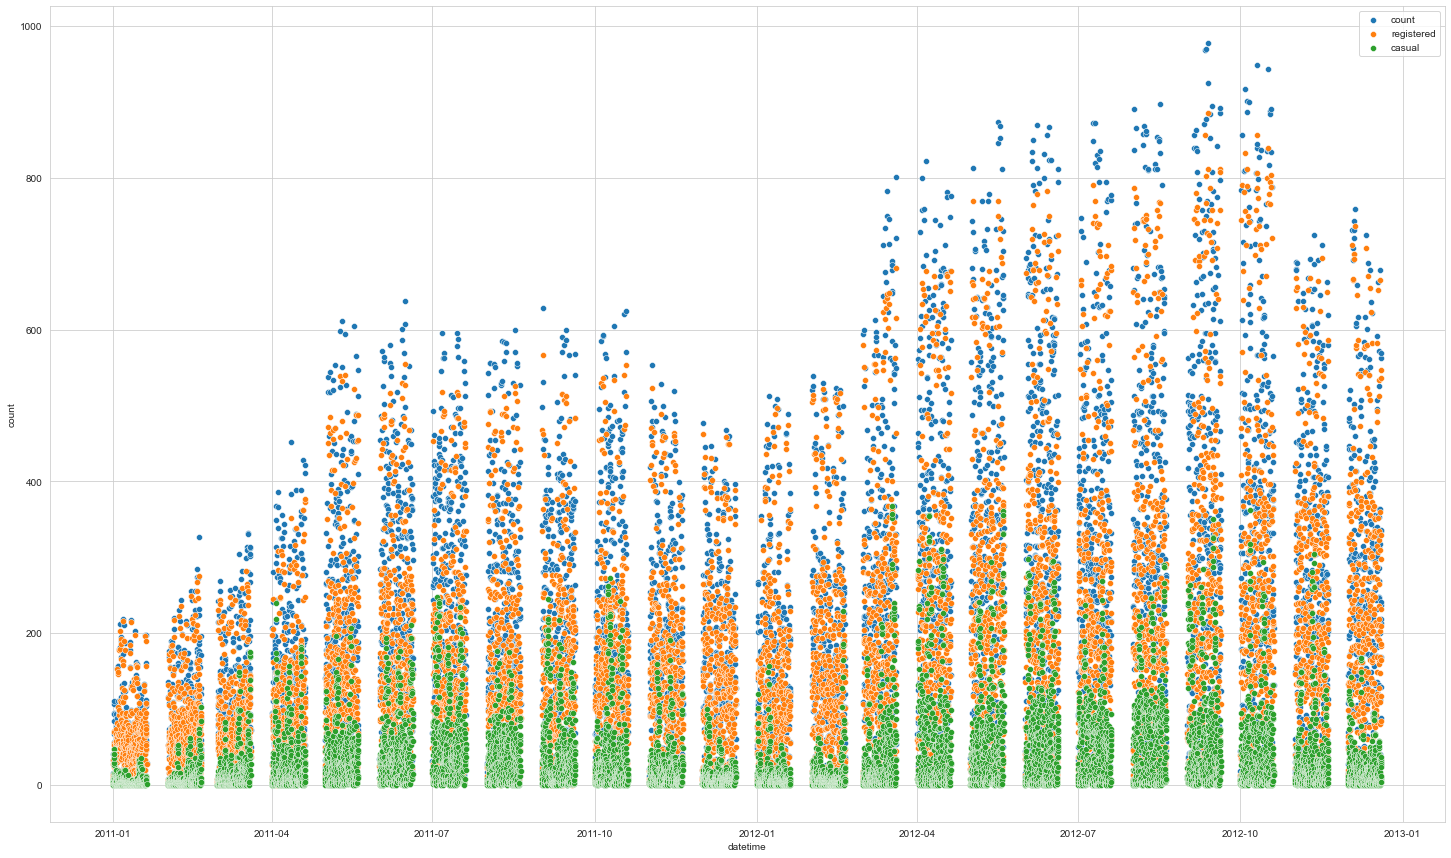

In [8]:
plt.figure(figsize=(25,15))
sns.scatterplot(x="datetime", y="count", data=dataset)
sns.scatterplot(x="datetime", y="registered", data=dataset)
sns.scatterplot(x="datetime", y="casual", data=dataset)
plt.legend(["count", "registered", "casual"])
plt.show()

Nous pouvons clairement observer une saisonalité dans l'évolution du nombre total de locations au sein d'une même année, ainsi qu'un offset entre l'année 2011 et l'année 2012, cette dernière ayant enregistré significativement plus de locations.

Il apparaît que le nombre de locations `casual` a moins augmenté d'une année sur l'autre que le nombre de locations `registered`. Ce type de service est très axé sur les "commuters". Il semble donc logique que, suite à une campagne d'informations et de publicité, le nombre d'utilisaterus réguliers ai augmenté d'une année sur l'autre.

### Influence de la saison sur le nombre total de locations

Ci-dessous, nous traçons le nombre total de locations par jour pour chaque saison et ce pour l'année 2011 et 2012 pour voir si une tendance se répète d'une année sur l'autre.

<AxesSubplot:xlabel='season', ylabel='count'>

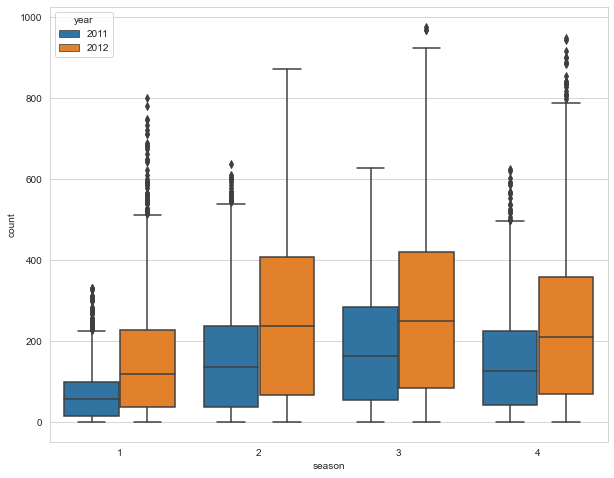

In [9]:
plt.figure(figsize=(10,8))
sns.boxplot(x="season", y="count", data=dataset, hue="year")

Nous observons bien la saisonalité que nous avions déjà observée sur le graphe précédent. Sur les deux années consécutives, le printemps et l'été ont, logiquement, été les deux saisons où le nombre de locations-jour étaient le plus élévé. Cela est surement dû à la météo plus favorable qui pousse plus de gens à utiliser ce moyen de transports tant pour le commuting que pour le loisir et à l'affluence de touristes sur ces deux saisons.

### Influence du jour de la semaine sur le nombre total de locations

Intéressons-nous maintenant à l'évolution du nombre total de locations au cours d'une semaine. Quels sont les jours pour lesquels la demande est la plus forte?

<AxesSubplot:xlabel='weekday', ylabel='count'>

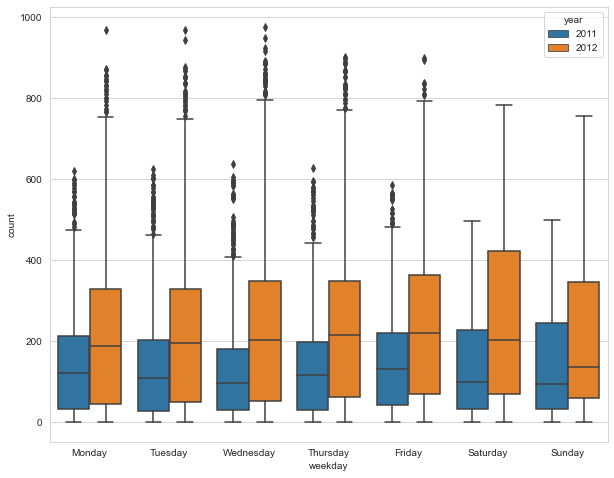

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(x="weekday", y="count", data=dataset, hue="year", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

Nous observons une tendance légèrement différente entre l'année 2011 et l'année 2012.

Sur l'année 2011, le nombre total de locations était, en se basant sur la médiane pour cette période, plus élevé les Lundi, Mardi, Jeudi et Vendredi. Le Mercredi étant un jour préféré pour le télé-travail, il est possible que les utilisateurs réguliers aient eu en moyenne moins recours au service de location ce jour-ci.
Sur cette même année, la demande semblait plus faible les Samedi et Dimanche. Cela était peut-être dû à une part moins importante des utilisateurs `casual` par rapport aux utilisateurs `registered`.

Pour l'année 2012, la demande était relativement constante au cours des cinq jours travaillés de la semaine, avec une augmentation sensible à l'approche du week-end. La plus grande variation de la demande les Samedi traduit peut-être de l'influence de la météo sur l'utilisation de ce service pour le loisir sur ce jour de weekend. Les Dimanche, la demande était significativement plus faible.

Dans la continuité du graphe précédent, nous pouvons tracer le nombre total de locations en fonction seulement du statut du jour (travaillé ou non) en prenant en compte la colonne `workingday`, originellement présente dans le jeu de données.

<AxesSubplot:xlabel='workingday', ylabel='count'>

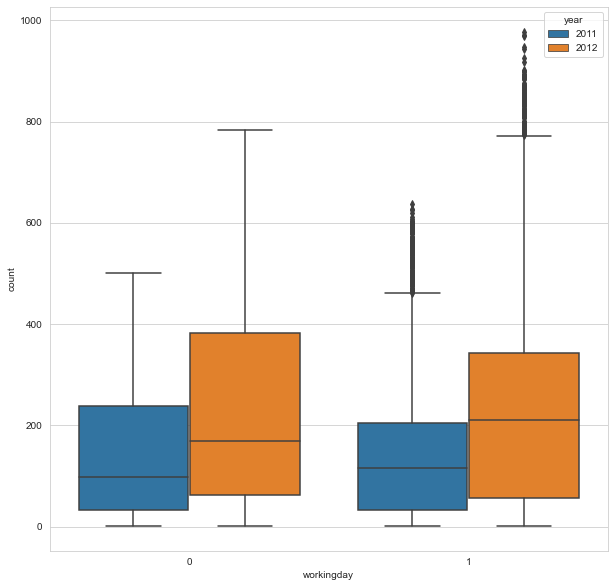

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(x="workingday", y="count", data=dataset, hue="year")

### Influence des vacances sur le nombre total de locations

<AxesSubplot:xlabel='holiday', ylabel='count'>

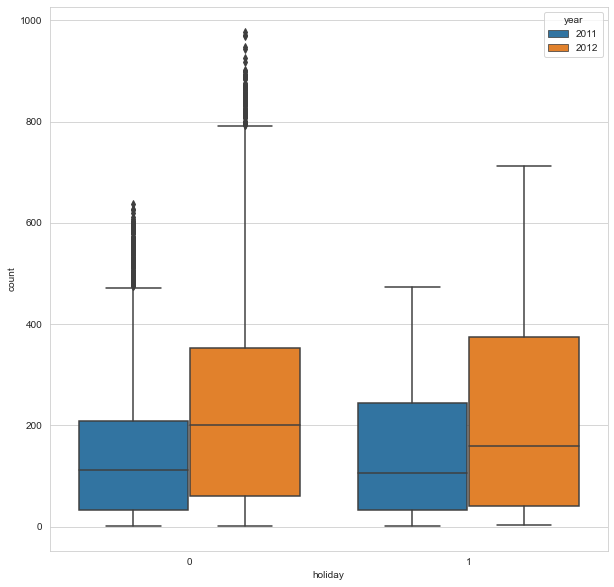

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(x="holiday", y="count", data=dataset, hue="year")

### Influence de la météo sur le nombre total de locations

<AxesSubplot:xlabel='weather', ylabel='count'>

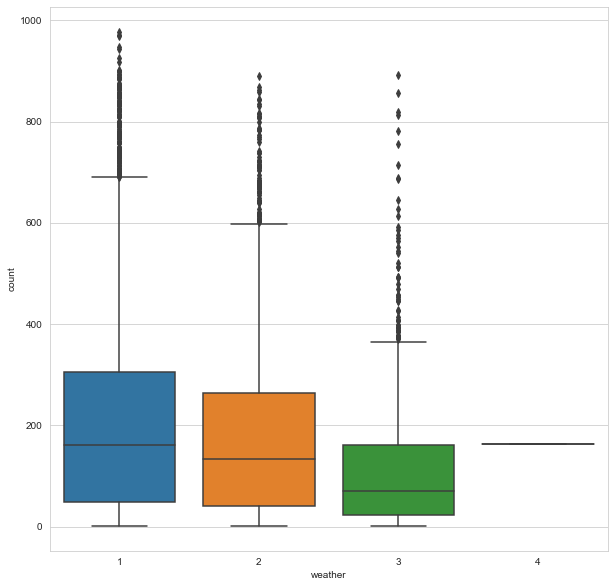

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(x="weather", y="count", data=dataset)

### Influence de la température sur le nombre total de locations

<AxesSubplot:xlabel='atemp', ylabel='count'>

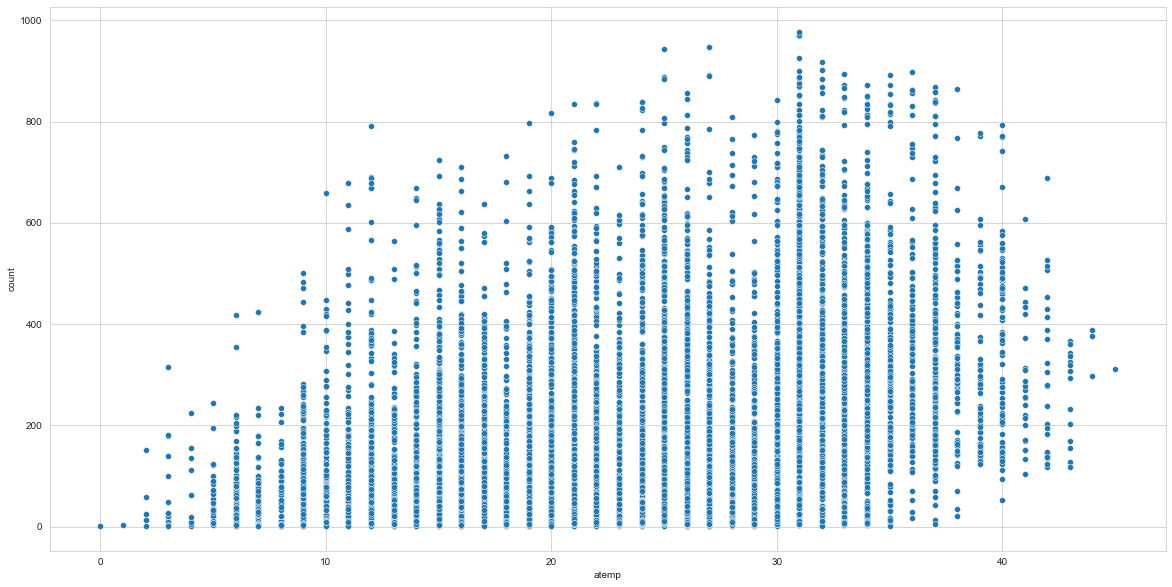

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="atemp", y="count", data=dataset)

### Influence de l'humidité sur le nombre total de locations

<AxesSubplot:xlabel='humidity', ylabel='count'>

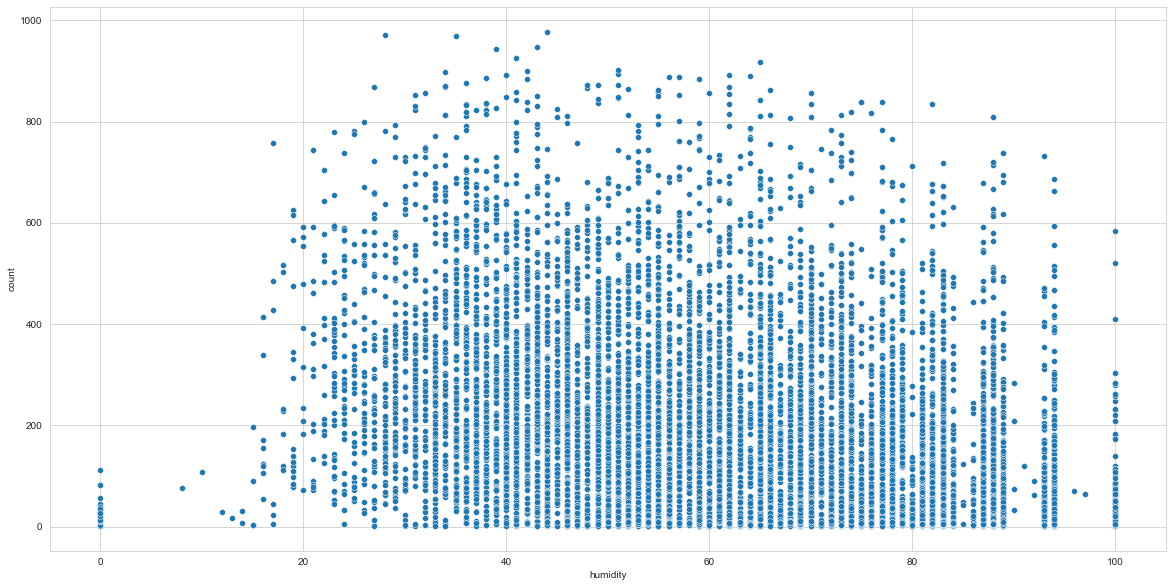

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="humidity", y="count", data=dataset)

### Influence de la vitesse du vent sur le nombre total de locations

<AxesSubplot:xlabel='windspeed', ylabel='count'>

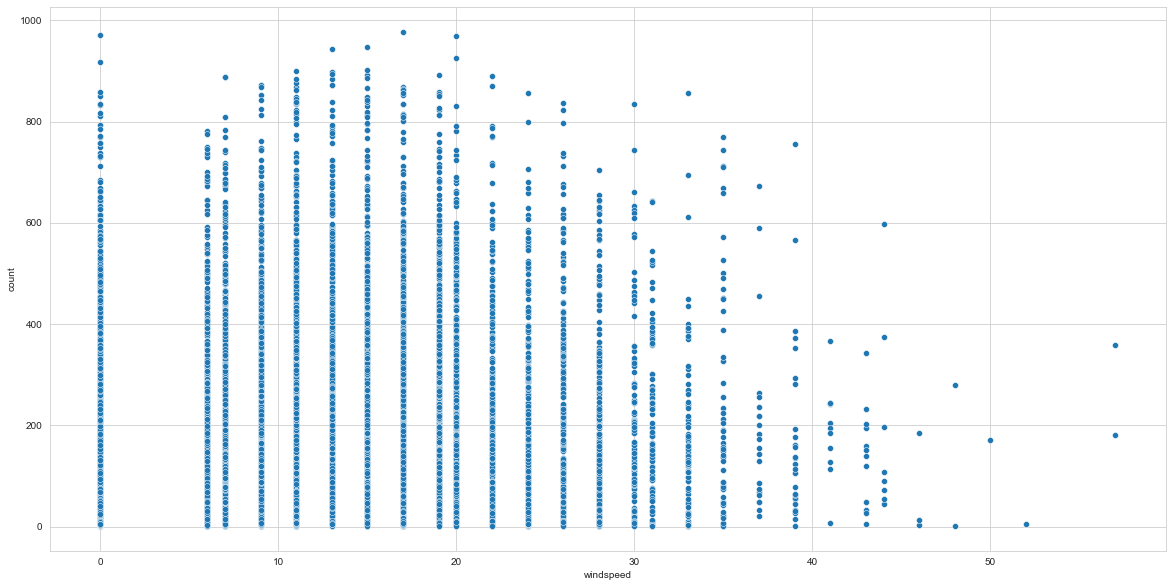

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="windspeed", y="count", data=dataset)

### Résumé des observations

L'analyse de l'influence de chaque variable prédictice sur la variable à prédire `count` nous a permis de faire les observations suivantes:


## Préparation du jeu de données

Nous préparons maintenant le jeu de données pour le rendre exploitable pour l'entraînement d'algorithmes de prédiction.

Nous commençons par supprimer les colonnes suivantes:
- `datetime`: car l'information temporelle est portée par d'autres variables telles que `weekday` ou `hour`.
- `year`: car l'évolution observée de la demande d'une année sur l'autre ne sera pas forcément répétable et ne paraît donc pas être une variable prédictive pertinente.
- `casual` et `registered`: car elles servent directement à calculer la variable à prédire `count`.

In [32]:
dataset.drop(columns=["datetime", "year", "casual", "registered"], inplace=True)

### Séparation en jeux d'entraînement et de test

Une fois le nombre de variables figé, nous pouvons séparer le jeu de données en un jeu de données d'entraînement et un jeu de données de test. 
Pour cela, nous décidons de réserver 20% des observations au jeu de test.

In [33]:
target = "count"

y = dataset[target]
X = dataset[dataset.columns.difference([target])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of train samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")

Number of train samples: 8708
Number of test samples: 2178


### Feature Engineering

In [34]:
def assign_quarter(hour):
    if (hour >= 0) & (hour < 6):
        return 1
    elif (hour >= 6) & (hour < 12):
        return 2
    elif (hour >= 12) & (hour < 18):
        return 3    
    elif (hour >= 18) & (hour < 24):
        return 4

In [35]:
day_quarter = dataset["hour"].apply(assign_quarter)
hour_col_idx = dataset.columns.get_loc("hour")
dataset.drop(columns=["hour"], inplace=True)
dataset.insert(loc=hour_col_idx, column="day_quarter", value=day_quarter)
dataset["day_quarter"] = dataset["day_quarter"].astype("category")

In [36]:
dataset

,season,weekday,holiday,workingday,day_quarter,weather,temp,atemp,humidity,windspeed,count
0,1,Saturday,0,0,1,1,9,14,81,0.0,16
1,1,Saturday,0,0,1,1,9,13,80,0.0,40
2,1,Saturday,0,0,1,1,9,13,80,0.0,32
3,1,Saturday,0,0,1,1,9,14,75,0.0,13
4,1,Saturday,0,0,1,1,9,14,75,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,Wednesday,0,1,4,1,15,19,50,26.0,336
10882,4,Wednesday,0,1,4,1,14,17,57,15.0,241
10883,4,Wednesday,0,1,4,1,13,15,61,15.0,168
10884,4,Wednesday,0,1,4,1,13,17,61,6.0,129


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       10886 non-null  category
 1   weekday      10886 non-null  category
 2   holiday      10886 non-null  category
 3   workingday   10886 non-null  category
 4   day_quarter  10886 non-null  category
 5   weather      10886 non-null  category
 6   temp         10886 non-null  int64   
 7   atemp        10886 non-null  int64   
 8   humidity     10886 non-null  int64   
 9   windspeed    10886 non-null  float64 
 10  count        10886 non-null  int64   
dtypes: category(6), float64(1), int64(4)
memory usage: 490.3 KB


In [47]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

numeric_features = X_train.select_dtypes([np.number]).columns
categorical_features = X_train.select_dtypes(["category"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("model", RandomForestRegressor())
    ]
)

param_grid = {
    "model__n_estimators": [20, 50, 100],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['atemp', 'hour', 'humidity', 'temp', 'windspeed'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['holiday', 'season', 'weather', 'weekday', 'workingday'], dtype='object'))])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__n_estimators': [20, 50, 100]})

In [48]:
print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
print(grid_search.best_params_)

Best parameter (CV score=0.857):
{'model__n_estimators': 100}


In [53]:
predictions = grid_search.predict(X_test)
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))